# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

converged SCF energy = 0.164175012061695
E = 0.1574821347983626 Eh
converged SCF energy = -0.839684083956066
E = -0.8488991057547286 Eh
converged SCF energy = -1.07486102490599
E = -1.0882281842437145 Eh
converged SCF energy = -1.11750157922789
E = -1.1369289593879268 Eh
converged SCF energy = -1.09513510118901
E = -1.1229570528666366 Eh
converged SCF energy = -1.04953250777026
E = -1.088764536606875 Eh
converged SCF energy = -0.995976005034107
E = -1.0504420373457724 Eh
converged SCF energy = -0.941480654707799
E = -1.0154682492882454 Eh
converged SCF energy = -0.889889958382754
E = -0.987393055625748 Eh
converged SCF energy = -0.843174458569733
E = -0.9670259116896887 Eh
converged SCF energy = -0.802135433844889
E = -0.953424238929029 Eh
converged SCF energy = -0.766864889751916
E = -0.9449089871327181 Eh
converged SCF energy = -0.737027158095766
E = -0.9398197912427146 Eh
converged SCF energy = -0.712060259734193
E = -0.9368706035430503 Eh
converged SCF energy = -0.691327561197378
E

In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

converged SCF energy = 0.164175012061695
E = 0.1641750120616945 Eh
converged SCF energy = -0.839684083956066
E = -0.8396840839560673 Eh
converged SCF energy = -1.07486102490599
E = -1.0748610249059856 Eh
converged SCF energy = -1.11750157922789
E = -1.1175015792278888 Eh
converged SCF energy = -1.09513510118901
E = -1.0951351011890114 Eh
converged SCF energy = -1.04953250777026
E = -1.049532507770262 Eh
converged SCF energy = -0.995976005034107
E = -0.9959760050341069 Eh
converged SCF energy = -0.941480654707799
E = -0.9414806547077987 Eh
converged SCF energy = -0.889889958382754
E = -0.8898899583827544 Eh
converged SCF energy = -0.843174458569733
E = -0.8431744585697334 Eh
converged SCF energy = -0.802135433844889
E = -0.8021354338448896 Eh
converged SCF energy = -0.766864889751916
E = -0.7668648897519159 Eh
converged SCF energy = -0.737027158095766
E = -0.7370271580957655 Eh
converged SCF energy = -0.712060259734193
E = -0.7120602597341927 Eh
converged SCF energy = -0.691327561197378

In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

converged SCF energy = 0.164175012061695
E = 0.15748213187554627 Eh
converged SCF energy = -0.839684083956066
E = -0.8488991194884011 Eh
converged SCF energy = -1.07486102490599
E = -1.088228226369215 Eh
converged SCF energy = -1.11750157922789
E = -1.1369290925648163 Eh
converged SCF energy = -1.09513510118901
E = -1.122957052870124 Eh
converged SCF energy = -1.04953250777026
E = -1.0887645366332943 Eh
converged SCF energy = -0.995976005034107
E = -1.0504420376226034 Eh
converged SCF energy = -0.941480654707799
E = -1.0154682493815126 Eh
converged SCF energy = -0.889889958382754
E = -0.9873930560203342 Eh
converged SCF energy = -0.843174458569733
E = -0.967025912745896 Eh
converged SCF energy = -0.802135433844889
E = -0.9534242405780754 Eh
converged SCF energy = -0.766864889751916
E = -0.9449089882730493 Eh
converged SCF energy = -0.737027158095766
E = -0.9398197914114315 Eh
converged SCF energy = -0.712060259734193
E = -0.9368706035448516 Eh
converged SCF energy = -0.691327561197378


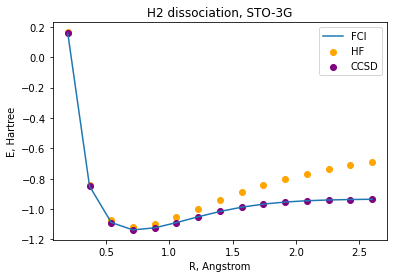

In [7]:
#Plot H2 PESs
%matplotlib inline

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [8]:
bond_lengths = np.linspace(0.5,2.7,15)

In [9]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

converged SCF energy = -73.1294523897688
E = -73.14266064419182 Eh
converged SCF energy = -74.4533755394603
E = -74.47510751244849 Eh
converged SCF energy = -74.870474914869
E = -74.90403466185091 Eh
converged SCF energy = -74.9629980695872
E = -75.01375475283757 Eh
converged SCF energy = -74.9280772606054
E = -75.00350455957073 Eh
converged SCF energy = -74.8427106360512
E = -74.95165998270588 Eh
converged SCF energy = -74.7404009823899
E = -74.89214773895249 Eh
converged SCF energy = -74.6356397052129
E = -74.83920106144599 Eh
converged SCF energy = -74.5355993564525
E = -74.79864247355975 Eh
converged SCF energy = -74.4447494379007
E = -74.77160104176531 Eh
converged SCF energy = -74.3648409739232
E = -74.75568062884761 Eh
converged SCF energy = -74.2975641705531
E = -74.74704179511417 Eh
converged SCF energy = -74.2414470355423
E = -74.74248580253675 Eh
converged SCF energy = -74.2701898592245
E = -74.74007321750213 Eh
SCF not converged.
SCF energy = -74.2709658561893
E = -74.73878

In [10]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

converged SCF energy = -73.1294523897688
E = -73.12945238976876 Eh
converged SCF energy = -74.4533755394603
E = -74.45337553946034 Eh
converged SCF energy = -74.870474914869
E = -74.87047491486905 Eh
converged SCF energy = -74.9629980695872
E = -74.96299806958717 Eh
converged SCF energy = -74.9280772606054
E = -74.92807726060543 Eh
converged SCF energy = -74.8427106360512
E = -74.84271063605117 Eh
converged SCF energy = -74.7404009823899
E = -74.7404009823899 Eh
converged SCF energy = -74.6356397052129
E = -74.6356397052129 Eh
converged SCF energy = -74.5355993564525
E = -74.53559935645228 Eh
converged SCF energy = -74.4447494379007
E = -74.44474943790095 Eh
converged SCF energy = -74.3648409739232
E = -74.36484097366971 Eh
converged SCF energy = -74.2975641705531
E = -74.29756417047044 Eh
converged SCF energy = -74.2414470355423
E = -74.24144703553986 Eh
converged SCF energy = -74.2701898592245
E = -74.27018985922453 Eh
SCF not converged.
SCF energy = -74.2709658561893
E = -74.2709795

In [11]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

converged SCF energy = -73.1294523897688
E = -73.14264199013863 Eh
converged SCF energy = -74.4533755394603
E = -74.47507181152251 Eh
converged SCF energy = -74.870474914869
E = -74.9039657254601 Eh
converged SCF energy = -74.9629980695872
E = -75.01362375104934 Eh
converged SCF energy = -74.9280772606054
E = -75.00323818884036 Eh
converged SCF energy = -74.8427106360512
E = -74.95111229479166 Eh
converged SCF energy = -74.7404009823899
E = -74.89124014326615 Eh
converged SCF energy = -74.6356397052129
E = -74.83851102902905 Eh
converged SCF energy = -74.5355993564525
E = -74.800707512992 Eh
converged SCF energy = -74.4447494379007
E = -74.7810888182304 Eh
converged SCF energy = -74.3648409739232
E = -74.77699594650683 Eh
converged SCF energy = -74.2975641705531
E = -74.7797599784174 Eh
converged SCF energy = -74.2414470355423
E = -74.78341476280805 Eh
converged SCF energy = -74.2701898592245
E = -74.6423936595491 Eh
SCF not converged.
SCF energy = -74.2709658561893
E = -74.64221038359

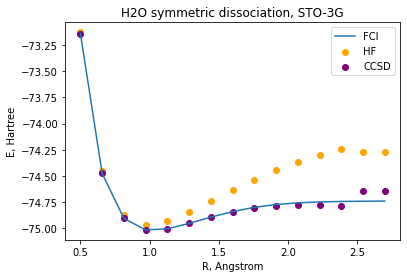

In [12]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

# LiH experiments

In [13]:
bond_lengths = [x for x in np.linspace(1.0,3.,15)]
print("Bonds ", bond_lengths)

Bonds  [1.0, 1.1428571428571428, 1.2857142857142856, 1.4285714285714286, 1.5714285714285714, 1.7142857142857142, 1.8571428571428572, 2.0, 2.142857142857143, 2.2857142857142856, 2.4285714285714284, 2.571428571428571, 2.7142857142857144, 2.8571428571428568, 3.0]


In [14]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

converged SCF energy = -7.76736213574856
E = -7.784021320447714 Eh
converged SCF energy = -7.8217717368278
E = -7.83823071309703 Eh
converged SCF energy = -7.85014930748358
E = -7.867021394007146 Eh
converged SCF energy = -7.86186054886682
E = -7.879828050123835 Eh
converged SCF energy = -7.86266233945033
E = -7.88244271005656 Eh
converged SCF energy = -7.8562578126226
E = -7.878602083177335 Eh
converged SCF energy = -7.84511350054133
E = -7.870818098786525 Eh
converged SCF energy = -7.83090558463708
E = -7.8608282582306135 Eh
converged SCF energy = -7.81478745947676
E = -7.849862022801246 Eh
converged SCF energy = -7.79756397296905
E = -7.838807629693247 Eh
converged SCF energy = -7.77981080726173
E = -7.828313535815831 Eh
converged SCF energy = -7.76195663663687
E = -7.818838820450994 Eh
converged SCF energy = -7.74433634734151
E = -7.810666366425997 Eh
converged SCF energy = -7.72722087675799
E = -7.803904126770144 Eh
converged SCF energy = -7.71082990021723
E = -7.798504222541858 E

In [15]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

converged SCF energy = -7.76736213574856
E = -7.76736213574858 Eh
converged SCF energy = -7.8217717368278
E = -7.821771736827804 Eh
converged SCF energy = -7.85014930748358
E = -7.850149307483593 Eh
converged SCF energy = -7.86186054886682
E = -7.861860548867691 Eh
converged SCF energy = -7.86266233945033
E = -7.862662339450331 Eh
converged SCF energy = -7.8562578126226
E = -7.8562578126226015 Eh
converged SCF energy = -7.84511350054133
E = -7.845113500541334 Eh
converged SCF energy = -7.83090558463708
E = -7.830905584637083 Eh
converged SCF energy = -7.81478745947676
E = -7.8147874594767615 Eh
converged SCF energy = -7.79756397296905
E = -7.797563972969052 Eh
converged SCF energy = -7.77981080726173
E = -7.779810807261728 Eh
converged SCF energy = -7.76195663663687
E = -7.761956636636876 Eh
converged SCF energy = -7.74433634734151
E = -7.744336347341508 Eh
converged SCF energy = -7.72722087675799
E = -7.727220876757992 Eh
converged SCF energy = -7.71082990021723
E = -7.71082990021723 

In [16]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

converged SCF energy = -7.76736213574856
E = -7.784021320322783 Eh
converged SCF energy = -7.8217717368278
E = -7.838230695801694 Eh
converged SCF energy = -7.85014930748358
E = -7.867021394305881 Eh
converged SCF energy = -7.86186054886682
E = -7.8798280505999685 Eh
converged SCF energy = -7.86266233945033
E = -7.88244271080792 Eh
converged SCF energy = -7.8562578126226
E = -7.878602083257619 Eh
converged SCF energy = -7.84511350054133
E = -7.87081809840468 Eh
converged SCF energy = -7.83090558463708
E = -7.860828240375539 Eh
converged SCF energy = -7.81478745947676
E = -7.849862021437759 Eh
converged SCF energy = -7.79756397296905
E = -7.838807629443284 Eh
converged SCF energy = -7.77981080726173
E = -7.828313535833144 Eh
converged SCF energy = -7.76195663663687
E = -7.81883882162407 Eh
converged SCF energy = -7.74433634734151
E = -7.810666365994729 Eh
converged SCF energy = -7.72722087675799
E = -7.803904122059267 Eh
converged SCF energy = -7.71082990021723
E = -7.79850422476594 Eh


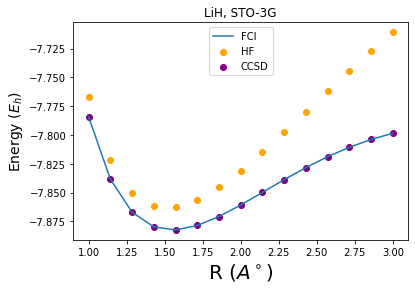

In [18]:
#Plot LiH PESs
plt.title('LiH, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend(loc = 'upper center')

# N_2 experiments

In [19]:
bond_lengths = [x for x in np.linspace(1.0,2.5,15)] 

In [20]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

converged SCF energy = -107.419532451682
E = -107.54909913089496 Eh
converged SCF energy = -107.498107964779
E = -107.65770236159335 Eh
converged SCF energy = -107.482163844633
E = -107.67646774352286 Eh
converged SCF energy = -107.418881320941
E = -107.65247596476337 Eh
converged SCF energy = -107.333986469678
E = -107.6113769769133 Eh
converged SCF energy = -107.241164238016
E = -107.56694555601618 Eh
converged SCF energy = -107.147678080256
E = -107.52681894459629 Eh
converged SCF energy = -107.057543201456
E = -107.49501004199278 Eh
converged SCF energy = -106.97309583238
E = -107.4726266799452 Eh
converged SCF energy = -106.895649038756
E = -107.45844046039899 Eh
converged SCF energy = -106.825762218971
E = -107.45013816013336 Eh
converged SCF energy = -106.763423294753
E = -107.44549417014312 Eh
converged SCF energy = -106.708240719537
E = -107.44289975521387 Eh
converged SCF energy = -106.659630621238
E = -107.441380356629 Eh
converged SCF energy = -106.616959082769
E = -107.440

In [21]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')

converged SCF energy = -107.419532451682
E = -107.41953245168216 Eh
converged SCF energy = -107.498107964779
E = -107.49810796477881 Eh
converged SCF energy = -107.482163844633
E = -107.4821638446329 Eh
converged SCF energy = -107.418881320941
E = -107.41888132094114 Eh
converged SCF energy = -107.333986469678
E = -107.33398646967771 Eh
converged SCF energy = -107.241164238016
E = -107.24116423801624 Eh
converged SCF energy = -107.147678080256
E = -107.14767808025617 Eh
converged SCF energy = -107.057543201456
E = -107.05754320145627 Eh
converged SCF energy = -106.97309583238
E = -106.97309583238015 Eh
converged SCF energy = -106.895649038756
E = -106.89564903875645 Eh
converged SCF energy = -106.825762218971
E = -106.82576221897088 Eh
converged SCF energy = -106.763423294753
E = -106.76342329475276 Eh
converged SCF energy = -106.708240719537
E = -106.70824071953662 Eh
converged SCF energy = -106.659630621238
E = -106.65963062123777 Eh
converged SCF energy = -106.616959082769
E = -106.

In [22]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

converged SCF energy = -107.419532451682
E = -107.54652281753592 Eh
converged SCF energy = -107.498107964779
E = -107.65365969032304 Eh
converged SCF energy = -107.482163844633
E = -107.67022875455264 Eh
converged SCF energy = -107.418881320941
E = -107.6433010317038 Eh
converged SCF energy = -107.333986469678
E = -107.59905513922799 Eh
converged SCF energy = -107.241164238016
E = -107.55297693249399 Eh
converged SCF energy = -107.147678080256
E = -107.51661744093731 Eh
converged SCF energy = -107.057543201456
E = -107.50072648738458 Eh
converged SCF energy = -106.97309583238
E = -107.51332305813847 Eh
converged SCF energy = -106.895649038756
E = -107.54569410619425 Eh
converged SCF energy = -106.825762218971
E = -107.17441113149584 Eh
converged SCF energy = -106.763423294753
E = -107.2860758375516 Eh
converged SCF energy = -106.708240719537
E = -107.19051860873437 Eh
converged SCF energy = -106.659630621238
E = -107.06730701489165 Eh
converged SCF energy = -106.616959082769
E = -106.7

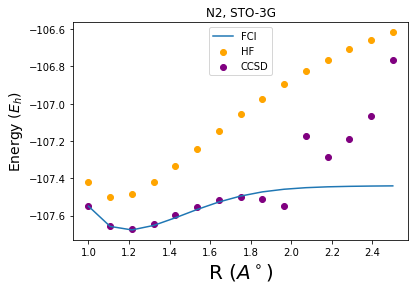

In [23]:
#Plot N2 PESs

plt.title('N2, STO-3G')
plt.xlabel(r'R ($A^\circ$)',fontsize=20)
plt.ylabel(r'Energy ($E_h$)',fontsize=14)

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend(loc = 'upper center')

# Separability experiments for LiH

In [26]:
r0 = 0.741
hf_PES = obtain_PES('h2', [r0], basis, method='hf')
fci_PES = obtain_PES('h2', [r0], basis, method='fci')
ccsd_PES = obtain_PES('h2', [r0], basis, method='ccsd')

hf_PES2 = obtain_PES('h2x2', [5.], basis, method='hf')
fci_PES2 = obtain_PES('h2x2', [5.], basis, method='fci')
ccsd_PES2 = obtain_PES('h2x2', [5.], basis, method='ccsd')



converged SCF energy = -1.1167061372361
E = -1.1167061372361042 Eh
converged SCF energy = -1.1167061372361
E = -1.1372744055294377 Eh
converged SCF energy = -1.1167061372361
E = -1.1372745709766414 Eh
Could not converge
Could not converge
Could not converge
